# k-Nearest Neighbors (k-NN)

## Personal Loan Acceptance

Universal Bank is a relatively young bank growing rapidly in terms of overall customer acquisition. The majority of these customers are liability customers (depositors) with varying sizes of relationship with the bank. The customer base of asset customers (borrowers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business. In particular, it wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise smarter campaigns with better target marketing. The goal is to use k-NN to predict whether a new customer will accept a loan offer. This will serve as the basis for the design of a new campaign.

The file universalbank.csv contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer’s relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Partition the data into training (60%) and validation (40%) sets. Find the optimal k value to perform a k-NN classification with all predictors except ID and ZIP code. Remember to transform categorical predictors with more than two categories into dummy variables first. Specify the success class as 1 (Personal Loan=1: accepting the loan), and use the default cutoff value of 0.5.

In [1]:
# Import required packages for this chapter

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Load the data into band_df dataframe
universalbank_df=pd.read_csv("universalbank.csv")


# Drop the columns that cannot be used in the model: ID and zip code
universalbank_df =universalbank_df.drop(columns=['ID', 'ZIP Code'])



# Use critical functions to explore the dataframe. Use print() to show results

print(universalbank_df.head())
print(universalbank_df.shape)
print(universalbank_df.count())
print(universalbank_df.describe())

   Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  
(5000, 12)
Age                   5000
Experience            5000
Income                5000
Family                5000
CCAvg                 5000
Education             5000
Mort

In [3]:
# Clean dataset
# 1. modify column names (Hint: are all the columns headers written in a way that can be used?
# I think they are fine...

In [4]:
# Clean dataset
# 2. create dummy variables for categorical variable, we consider Education as categorical variable

dummy_class=pd.get_dummies(universalbank_df['Education'])
dummy_class=dummy_class.rename(columns={1:"Education_1", 2:"Education_2", 3: "Education_3"})
universalbank_df=pd.concat([universalbank_df,dummy_class],axis=1)
print(universalbank_df.head())

   Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  Education_1  \
0                   1           0       0           0            1   
1                   1           0       0           0            1   
2                   0           0       0           0            1   
3                   0           0       0           0            0   
4                   0           0       0           1            0   

   Education_2  Education_3  
0            0            0  
1            0            0  
2 

In [5]:
# split dataset into training (60%) and validation (40%) sets
# print out the shape of the two splitted datasets to check your results.
train_df, valid_df = train_test_split(universalbank_df, test_size=.6,random_state = 10)
print('Training set: ', universalbank_df.shape, 'Validation set: ', universalbank_df.shape)

Training set:  (5000, 15) Validation set:  (5000, 15)


In [6]:
# Separate the predictors and the outcomes.
# Normalize te predictors of the training and validation sets.
# USE StandardScaler to standardize the dataset. 
# Use training set ONLY to train the StandardScaler model, name the transformation model scaler.

outcome ='Personal Loan'
predictors=list(train_df.columns)
predictors.remove(outcome)

scaler=preprocessing.StandardScaler()
scaler.fit(train_df[predictors])

train_X=scaler.transform(train_df[predictors])
valid_X=scaler.transform(valid_df[predictors])

train_y=train_df[outcome]
valid_y=valid_df[outcome]


# Print out the first five rows of the predictor in the training and validation sets
print(train_X, valid_X)





[[-1.53398499 -1.50502261  1.39352594 ...  1.187282   -0.61047817
  -0.67576937]
 [-0.66086473 -0.72204024 -0.77227577 ...  1.187282   -0.61047817
  -0.67576937]
 [-1.09742486 -1.15703044  0.70136251 ... -0.84225988 -0.61047817
   1.4797948 ]
 ...
 [ 0.29956756  0.40893429  0.45575613 ...  1.187282   -0.61047817
  -0.67576937]
 [ 0.38687959  0.40893429 -0.6159808  ... -0.84225988 -0.61047817
   1.4797948 ]
 [ 0.03763148  0.06094213  0.21014975 ...  1.187282   -0.61047817
  -0.67576937]] [[-0.92280081 -0.80903828 -1.06253785 ... -0.84225988  1.63806021
  -0.67576937]
 [ 0.56150364  0.66992841  0.03152693 ... -0.84225988  1.63806021
  -0.67576937]
 [ 0.56150364  0.49593233  0.2324776  ...  1.187282   -0.61047817
  -0.67576937]
 ...
 [-0.74817675 -0.80903828 -0.97322644 ... -0.84225988 -0.61047817
   1.4797948 ]
 [ 0.12494351 -0.02605591  0.14316619 ... -0.84225988  1.63806021
  -0.67576937]
 [-0.13699257 -0.02605591  1.4605095  ...  1.187282   -0.61047817
  -0.67576937]]


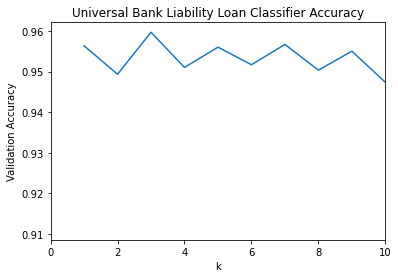

0.951 0.9503333333333334 0.9473333333333334


In [14]:
# Build kNN classifer and fit the model to the classifier
# Find the optimal k value with a for loop. Test out k starts at 1 and increases to 100. 
# For each k value ranging from 1 to 100. Store the score of the model on the validation sets in a list named accuracies.

k_list= range(1,100,1)
accuracies = []

for k in k_list:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_X, train_y)
    accuracies.append(classifier.score(valid_X,valid_y))
    

# Plot accuracies (y-axis) on k (x-axis).
# Set the x-axis label to "k"
# Set the y-axis label to "Validation Accuracy"
# Set the title to "Universal Bank Liability Loan Classifier Accuracy"

plt.plot(k_list, accuracies)
plt.xlim(0,10)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title("Universal Bank Liability Loan Classifier Accuracy")
plt.show()

print(accuracies[3],accuracies[7],accuracies[9])


# Answer question: what would be the optimal k value for this model?
# Your answer:
# 3. Probably. 

Consider the following customer:

Age = 40, Experience = 10, Income = 84, Family = 2, CCAvg = 2, Education_1= 0, Education_2 = 1, Education_3 = 0, Mortgage = 0, Securities Account = 0, CD Account = 0, Online = 1, and Credit Card = 1.  How would this customer be classified?

In [23]:
# put the customer into newcustomer dataframe
# print out this dataframe to check your result

newcustomer=pd.DataFrame([{'Age':40, 'Experience':10, 'Income':84, 'Family':2, 'CCAvg':2, 'Education_1': 0, 'Education_2': 1, 'Education_3':0, 'Mortgage':0, 'Securities Account':0, 'CD Account':0, 'Online':1, 'CreditCard': 1, 'NA':0}], columns=['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education_1', 'Education_2', 'Education_3', 'Mortgage', 'Securities Account', 'CD Account', 'Online','CreditCard', 'NA'])

print(newcustomer)

   Age  Experience  Income  Family  CCAvg  Education_1  Education_2  \
0   40          10      84       2      2            0            1   

   Education_3  Mortgage  Securities Account  CD Account  Online  CreditCard  \
0            0         0                   0           0       1           1   

   NA  
0   0  


In [24]:
# normalize newcustomer
# print out this dataframe to check your result
newcustomer=pd.DataFrame(scaler.transform(newcustomer),columns=newcustomer.columns)
print(newcustomer)

        Age  Experience    Income    Family     CCAvg  Education_1  \
0 -0.486241   -0.896036  0.254805 -0.328641  0.052314    -2.240209   

   Education_2  Education_3  Mortgage  Securities Account  CD Account  \
0    -0.553842    -0.327749 -0.229416           -1.194648   -0.639101   

     Online  CreditCard        NA  
0  1.187282     1.63806 -0.675769  


In [27]:
# Predicted class using the optimal k value you just discovered. 
# You may need to re-build the classifier using training set first.

classifier_new=KNeighborsClassifier(n_neighbors=3)
classifier_new.fit(train_X, train_y)
# predicted class, print out results

print(classifier_new.predict(newcustomer))


# predicted probability, print out results

print(classifier_new.predict_proba(newcustomer))



[0]
[[1. 0.]]


In [ ]:
# Interpret your results:

# We predict that they will not be accept the personal loan.

# Notes:Added an 'NA'value to newcustomer because the scaler was throwing an error, opted not to troubleshoot further.


# Lesson learned from this lab:


